# Die Schnelle Fourier-Transformation (FFT)


## DFT und FFT:
#### Quelle: https://de.wikipedia.org/wiki/Schnelle_Fourier-Transformation
Die [[Diskrete Fourier-Transformation|diskrete Fouriertransformation]] (DFT) eines Vektors $(x_0, \dotsc, x_{2n-1})$ der Dimension $2n$ lautet:

$$f_m = \sum_{k=0}^{2n-1} x_k \, e^{-\frac{2\pi \mathrm i}{2n} mk }
\qquad
m = 0, \dotsc, 2n-1$$

Die Einträge mit geraden Indizes werden notiert als
$x'_k = x_{2k}, \quad k = 0, \dotsc, n-1$
und deren DFT der Dimension $n$ als $(f'_k)$.

Entsprechend seien die Einträge mit ungeraden Indizes notiert als
$x''_k = x_{2k + 1}, \quad k = 0, \dotsc, n-1$
mit DFT $(f''_k)$.

Dann folgt:

$$
\begin{align}
f_m & =   \sum_{k=0}^{n-1} x_{2k  } e^{-\frac{2\pi \mathrm i}{2n} m(2k  )}
       +  \sum_{k=0}^{n-1} x_{2k+1} e^{-\frac{2\pi \mathrm i}{2n} m(2k+1)} \\[0.5em]
    & =                         \sum_{k=0}^{n-1} x' _k e^{-\frac{2\pi \mathrm i}{n} mk}
       +  e^{-\frac{\pi \mathrm i}{n}m} \sum_{k=0}^{n-1} x''_k e^{-\frac{2\pi \mathrm i}{n} mk}\\[0.5em]
& =  \begin{cases}
 f'_m     +  e^{-\frac{\pi \mathrm i}{n} m   } f''_m     & \text{ falls } m<n \\[0.5em]
 f'_{m-n} -  e^{-\frac{\pi \mathrm i}{n}(m-n)} f''_{m-n} & \text{ falls } m \geq n
\end{cases}
\end{align}
$$


## Abtasten eines Audiosignals

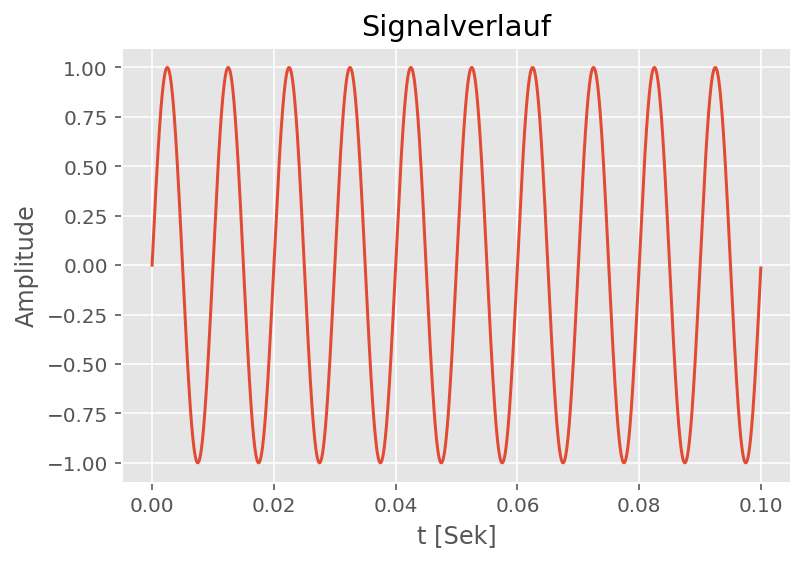

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Sampling 
Fs = 44100   # Abtastrate / sampling rate [Hz]
T = 1/Fs     # Abtastinterval 
t = 0.1      # Abtastdauer
N = Fs*t     # Anzahl Abtastpunkte 

# Signal
freq = 100           # Signalfrequenz [Hz]
omega = 2*np.pi*freq # Winkelfrequenz

# Graphen aufstellen
t_vek = np.arange(N)*T
y = np.sin(omega*t_vek)  #+ -2*np.cos(3*omega*t_vek)  + 3*np.sin(5*omega*t_vek)  + 0.25*np.random.randn(len(t_vek))

plt.plot(t_vek,y)
plt.ylabel('Amplitude')
plt.xlabel('t [Sek]')
plt.title("Signalverlauf")
plt.show()

### FFT (Schnelle Fourier-Trafo)

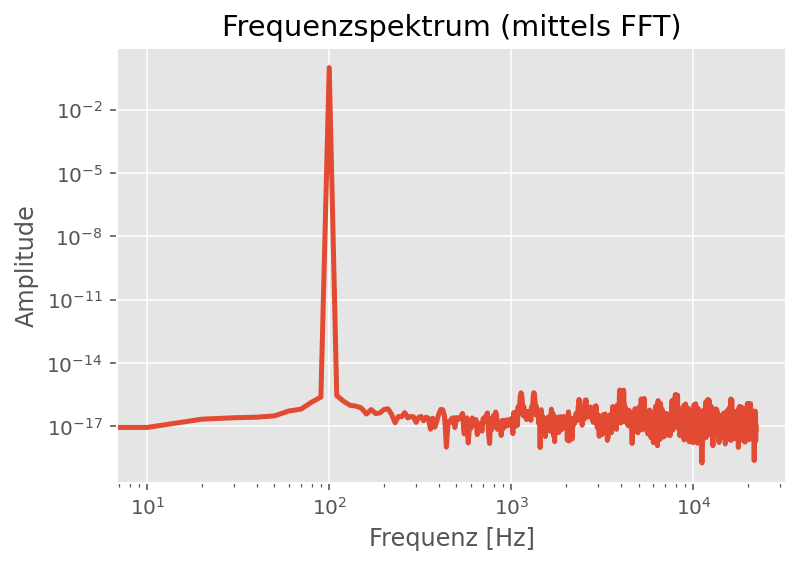

In [6]:
Y_k = np.fft.fft(y)[0:int(N/2)]/N    # FFT-Funktion (numpy-Package)
Y_k[1:] = 2*Y_k[1:]                  # need to take the single-sided spectrum only
Ampl = np.abs(Y_k)                   # Amplitude / Spektrum: Betrag der FFT-Funktion

f = Fs*np.arange((N/2))/N;           # Frequenzvektor (für Graphen)

# Graphen aufstellen
fig,ax = plt.subplots()
plt.plot(f,Ampl,linewidth=2.5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequenz [Hz]')
plt.title("Frequenzspektrum (mittels FFT)")
plt.show()